# Spectra in **``pycoco``**

---------------------

## Introduction
This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting spectra in **`pycoco`**, as a companion to the **`c`** code **`CoCo`**.
**`pycoco`** can be used to (*hopefully*) easily wrangle your exisiting spectra into the correct location/format.

In [178]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc
import astropy.units as u

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using **`SpectrumClass`**
----

### **`SpectrumClass`** Methods and Variables

TBA


In [179]:
S = pcc.SpectrumClass()

In [180]:
S.__dict__.keys()

['data_directory', '_default_data_dir_path']

In [181]:
spec_filename = "SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat"
S.load(spec_filename)

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat


In [182]:
S.data.show_in_notebook(display_length = 5)

idx,wavelength,flux
,Angstrom,erg / (cm2 s)
0,3301.65795898,2.796059e-15
1,3304.31681253,3.170794e-15
2,3306.97566607,3.686413e-15
3,3309.63451961,4.057969e-15
4,3312.29337316,3.761342e-15
5,3314.9522267,3.297081e-15
6,3317.61108024,3.096921e-15
7,3320.26993378,3.347441e-15
8,3322.92878733,3.369139e-15


{'_meta': {'filename': '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat'}, '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x11082ba10>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux')>, 'primary_key': None}


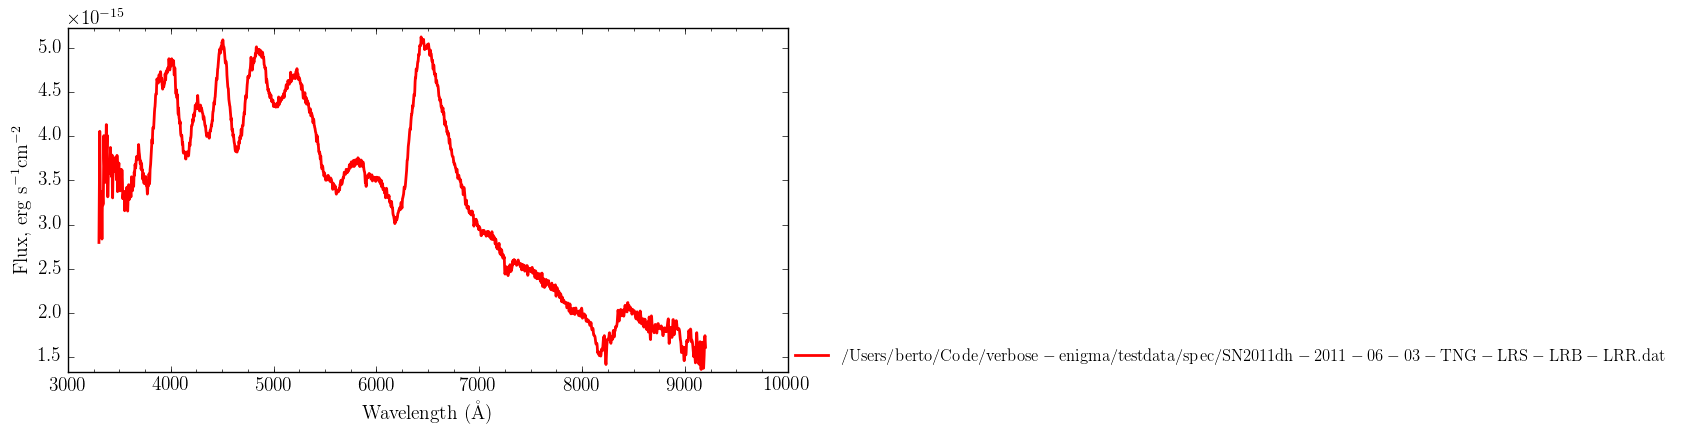

In [183]:
S.plot()

In [184]:
S.__dict__.keys()

['wavelength', 'data', 'flux', 'data_directory', '_default_data_dir_path']

In [185]:
c = pcc.extinction.unred(S.wavelength, S.flux, EBV_MW = 0.1)

In [186]:
S.set_EBV(0.1)

In [187]:
S.deredden()

Foo


In [188]:
S.data.show_in_notebook(display_length = 5)

idx,wavelength,flux,flux_dered
,Angstrom,erg / (cm2 s),erg / (cm2 s)
0,3301.65795898,2.796059e-15,4.48535469455e-15
1,3304.31681253,3.170794e-15,5.08487785706e-15
2,3306.97566607,3.686413e-15,5.90989288918e-15
3,3309.63451961,4.057969e-15,6.503521042e-15
4,3312.29337316,3.761342e-15,6.02626084841e-15
5,3314.9522267,3.297081e-15,5.28081636329e-15
6,3317.61108024,3.096921e-15,4.95871311218e-15
7,3320.26993378,3.347441e-15,5.35821638441e-15
8,3322.92878733,3.369139e-15,5.39132799323e-15


{'_meta': {'filename': '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat'}, '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x11082ba10>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_dered')>, 'primary_key': None}


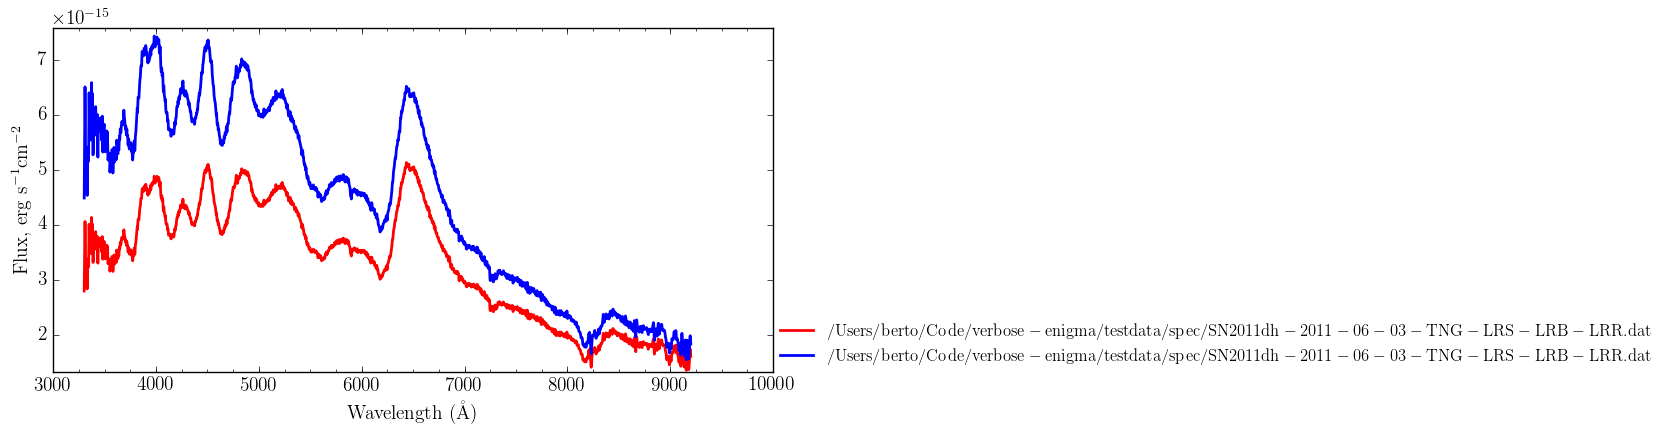

In [189]:
S.plot()

In [190]:
S.flux[0:5]

2.796059e-15
3.170794e-15
3.686413e-15
4.057969e-15
3.761342e-15


In [191]:
S.use_flux_dered()

In [192]:
S.flux[0:5]

4.48535469455e-15
5.08487785706e-15
5.90989288918e-15
6.503521042e-15
6.02626084841e-15


{'_meta': {'filename': '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat'}, '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x11082ba10>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_dered')>, 'primary_key': None}


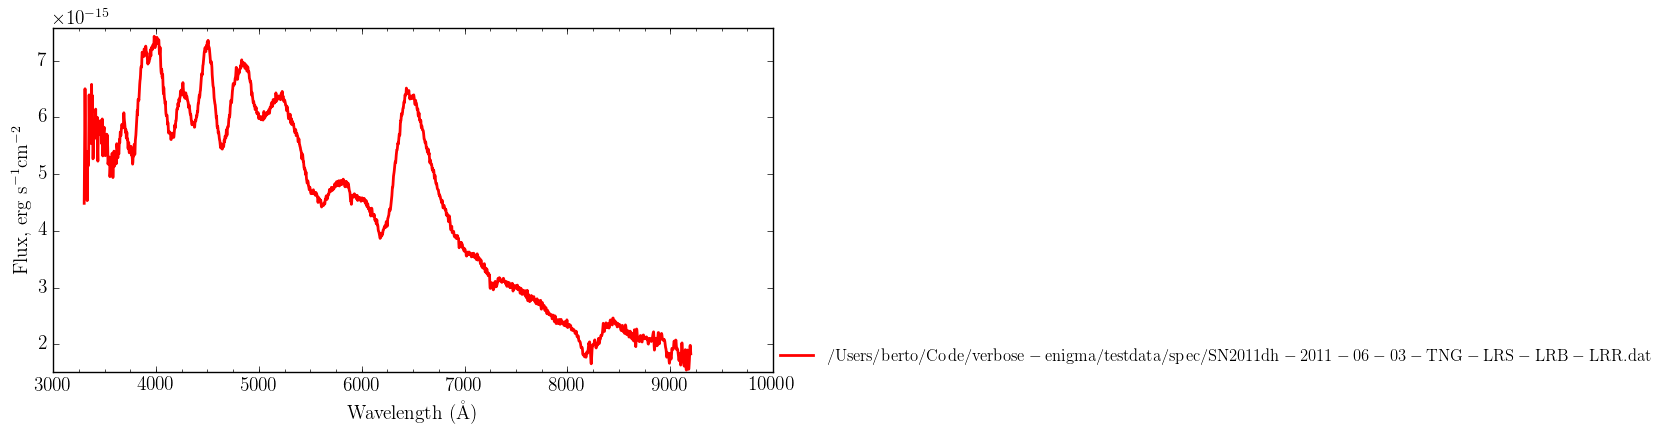

In [193]:
S.plot(compare_red = False)

In [194]:
S.get_MJD_obs()

/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat


In [ ]:
S.save("TEST.dat")